实际中， 可能会遇到多任务， 比如同时预测房价和一年后的房价，就有两个预测量

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import os
import sys
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras

print(sys.version_info)
for module in mpl,np, sklearn,pd,tf,keras:
    print(module.__name__,module.__version__)

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.0
numpy 1.16.4
sklearn 0.21.2
pandas 0.24.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 1    #,test_size = 0.25   default, 3:1
)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 2)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
# 多输入：wide部分和deep部分输入不同（实际中一般都是不同的）
input_wide = keras.layers.Input(shape=[5])  #去前五个feature
input_deep = keras.layers.Input(shape=[6])   #取后六个feature
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)

# 固化model （其实就是指定 input  和 output）
model = keras.models.Model(inputs = [input_wide, input_deep],
                           outputs = [output, output2])



model.summary()
model.compile(loss='mean_squared_error', optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [6]:
#wide takes first 5 features, deep takes last 6 features
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                    [y_train, y_train],
                   validation_data = ([x_valid_scaled_wide, x_valid_scaled_deep],
                                      [y_valid, y_valid]),
                   epochs = 100,
                   callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 3s 283us/sample - loss: 5.3178 - dense_2_loss: 2.6583 - dense_3_loss: 2.6595 - val_loss: 2.3301 - val_dense_2_loss: 1.0117 - val_dense_3_loss: 1.3183
Epoch 2/100
11610/11610 [==============================] - 3s 226us/sample - loss: 2.1062 - dense_2_loss: 0.8491 - dense_3_loss: 1.2571 - val_loss: 1.8984 - val_dense_2_loss: 0.7221 - val_dense_3_loss: 1.1763
Epoch 3/100
11610/11610 [==============================] - 3s 221us/sample - loss: 1.8070 - dense_2_loss: 0.6749 - dense_3_loss: 1.1321 - val_loss: 1.7366 - val_dense_2_loss: 0.6500 - val_dense_3_loss: 1.0867
Epoch 4/100
11610/11610 [==============================] - 2s 214us/sample - loss: 1.6633 - dense_2_loss: 0.6194 - dense_3_loss: 1.0440 - val_loss: 1.6139 - val_dense_2_loss: 0.6114 - val_dense_3_loss: 1.0025
Epoch 5/100
11610/11610 [==============================] - 2s 212us/sample - loss: 1.5451 - dense_2_loss: 0.5867 - 

Epoch 40/100
11610/11610 [==============================] - 2s 201us/sample - loss: 0.9821 - dense_2_loss: 0.4326 - dense_3_loss: 0.5495 - val_loss: 0.9879 - val_dense_2_loss: 0.4339 - val_dense_3_loss: 0.5540
Epoch 41/100
11610/11610 [==============================] - 2s 202us/sample - loss: 0.9774 - dense_2_loss: 0.4316 - dense_3_loss: 0.5458 - val_loss: 0.9814 - val_dense_2_loss: 0.4321 - val_dense_3_loss: 0.5493
Epoch 42/100
11610/11610 [==============================] - 2s 210us/sample - loss: 0.9712 - dense_2_loss: 0.4290 - dense_3_loss: 0.5422 - val_loss: 0.9776 - val_dense_2_loss: 0.4301 - val_dense_3_loss: 0.5475
Epoch 43/100
11610/11610 [==============================] - 2s 206us/sample - loss: 0.9661 - dense_2_loss: 0.4272 - dense_3_loss: 0.5389 - val_loss: 0.9718 - val_dense_2_loss: 0.4284 - val_dense_3_loss: 0.5434
Epoch 44/100
11610/11610 [==============================] - 2s 202us/sample - loss: 0.9610 - dense_2_loss: 0.4255 - dense_3_loss: 0.5355 - val_loss: 0.9671 - va

11610/11610 [==============================] - 2s 205us/sample - loss: 0.8099 - dense_2_loss: 0.3694 - dense_3_loss: 0.4405 - val_loss: 0.8053 - val_dense_2_loss: 0.3653 - val_dense_3_loss: 0.4400
Epoch 80/100
11610/11610 [==============================] - 3s 217us/sample - loss: 0.8049 - dense_2_loss: 0.3674 - dense_3_loss: 0.4374 - val_loss: 0.8034 - val_dense_2_loss: 0.3643 - val_dense_3_loss: 0.4391
Epoch 81/100
11610/11610 [==============================] - 2s 212us/sample - loss: 0.8017 - dense_2_loss: 0.3663 - dense_3_loss: 0.4355 - val_loss: 0.7986 - val_dense_2_loss: 0.3624 - val_dense_3_loss: 0.4362
Epoch 82/100
11610/11610 [==============================] - 2s 213us/sample - loss: 0.7985 - dense_2_loss: 0.3648 - dense_3_loss: 0.4337 - val_loss: 0.7972 - val_dense_2_loss: 0.3620 - val_dense_3_loss: 0.4352
Epoch 83/100
11610/11610 [==============================] - 2s 202us/sample - loss: 0.8035 - dense_2_loss: 0.3665 - dense_3_loss: 0.4370 - val_loss: 0.7930 - val_dense_2_los

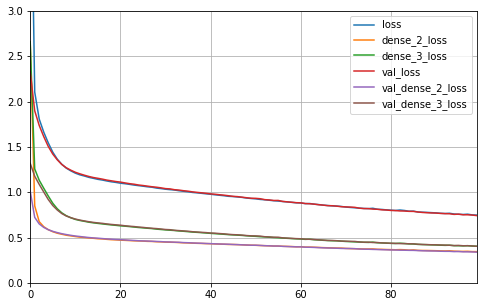

In [9]:
def plot_learnig_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,3)
    plt.show()
plot_learnig_curves(history)

In [10]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], [y_test, y_test])

5160/5160 [==============================] - 1s 123us/sample - loss: 0.7916 - dense_2_loss: 0.3705 - dense_3_loss: 0.4211


[0.7915958683620128, 0.37048763, 0.42110813]

loss 是后两个的和